In [25]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as  np
import cv2

In [32]:
## accepts gray image
import numpy as  np
import cv2
def find_edge(gray):
    gray = cv2.blur(gray, (5, 5))
    edges = cv2.Canny(gray,50,100)
    masked = cv2.bitwise_not(gray)
    
# Find contours
    _, cnts, _ = cv2.findContours(masked.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #print (len(cnts))
    c_masked = masked.copy()
    
#find contour with maximum area 
# sometime the entire picture becomes an area - in that case this program will need to tweaked    
    areas = []
    for c in cnts:
        areas.append(cv2.contourArea(c))
    
    tmp = areas.copy()
    tmp.sort(reverse=True) # sort the list to find the top contour area
    #print (tmp[0])
    c_index = areas.index(tmp[0])
    #print (c_index)
    
# find the min and max for the found contour as we only have to draw a rectangle     
    X = cnts[c_index][:,:,0]
    Y = cnts[c_index][:,:,1]
    
    x1 = np.min(X)
    x2 = np.max(X)
    y1 = np.min(Y)
    y2 = np.max(Y)

# return coordinates- Note: X,Y for CV2 is opposite of X, Y of Numpy array    
    return x1,x2,y1,y2

0:00:00.074083


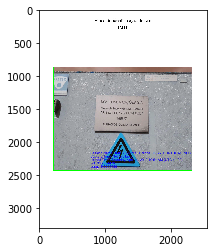

<function matplotlib.pyplot.show(*args, **kw)>

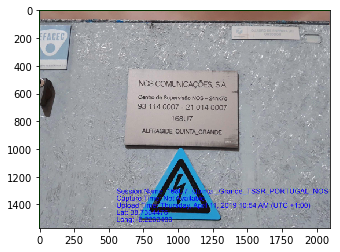

In [48]:
img = cv2.imread("data/out3.jpg")
gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
s1 = datetime.now()
x1,x2,y1,y2 = find_edge(gray)
s2 = datetime.now()
print (s2-s1)
img2 = cv2.rectangle(img.copy(),(x1,y1),(x2,y2),(0,255,0),10)
plt.imshow(img2)
plt.show()
plt.imshow(img2[y1:y2-2,x1:x2-2])
plt.show

In [47]:
cv2.imwrite('data/test.jpg',img2)

True